# pandas

[pandas](https://pandas.pydata.org/) is an open source library for tabular heterogeneous data manipulation. The core structures are `Series` and `DataFrame` which can be seen as a collection of Series.  In addition `pandas` provides the necessary means for data cleaning and preparation. `pandas` uses NumPy array structure  as an extension type with methods for conversion in both directions.

&#9888; A major difference between numpy arrays and `pandas` Series and DataFrame is in the way that <tt>pandas</tt> indices are used. In NumPy the index is implicitly assigned $0..(n-1)$ whereas `pandas` Series and DataFrame have similar behaviour but in addition allow labels as indices. In addition the indices are preserved after applying operations.

Many parallels can be drawn between <tt>pandas</tt> and `tidyverse` R package. In terms of data structure, Series and DataFrame can be viewed as vectors and data.frame/tibble respectively. Furthermore, in terms of functionality most data manipulation operations available in tidyverse have a counterparts in <tt>pandas</tt>.


In [2]:
# convention
import pandas as pd
import numpy as np
#
from numpy.random import default_rng
rng = default_rng()

## Series

`Series` is a sequence of values, possibly of heterogeneous types. You can create Series with the <tt>pd.Series</tt> function.

**Synopsis: &nbsp; &nbsp;**<tt>Series(data=None, index=None, dtype=None, name=None, copy=False)</tt>
 - data: array, iterable, dict, scalar
 - index: 1-dimensional array, otherwise $0..(n-1)$
 - dtype: [data types](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes), otherwise inferred
 - name: optional
 - copy: default False, data is not copied but is a reference

In [2]:
s = pd.Series([3,5,7])
print(s)
s = pd.Series({'a':3, 'b':5, 'c':7})
print(s)
s = pd.Series([3,5,7], index=['a','b','c'])
print(s)
s = pd.Series([3,5,7])
print(s)

0    3
1    5
2    7
dtype: int64
a    3
b    5
c    7
dtype: int64
a    3
b    5
c    7
dtype: int64
0    3
1    5
2    7
dtype: int64


Input data to pd.Series is not copied by default. In the following scenario an update to Series `s` propogates to NumPy array `arr`:

In [3]:
arr = np.array(range(3,7,2)) # NumPy array [3,7] with step=2
print(arr)
s = pd.Series(arr, copy=False) # default copy=False
print(s)
s[1] = -1                      # set value s[1] to -1
print(arr)
# print(s)

[3 5]
0    3
1    5
dtype: int64
[ 3 -1]


Series, besides the ordered indices $0..(n-1)$, may also be viewed as a dictionary where values are accessed based on mapped indices to values:

In [4]:
s = pd.Series({'a':3, 'b':5, 'c':7})
s[1] == s['b']

/var/folders/z7/xnwcgx9d04q493pxbdg5xkzh0000gn/T/ipykernel_58794/3114200323.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[1] == s['b']


True

Operations between Series are carried out based on matching indices as opposed to element-wise:

In [6]:
s1 = pd.Series({'a':"1", 'b':"5", 'c':2.1})
s2 = pd.Series({'b':"3", 'a':"5", 'c':2})
s1+s2

a     15
b     53
c    4.1
dtype: object

and they don't have to be the same size:

In [8]:
s3 = pd.Series({'b':'3', 'a':'5', 'c':2, 'd':10}) # there is no matching 'd' in s1 therefore d=NaN
s1+s3

a     15
b     53
c    4.1
d    NaN
dtype: object

Index membership:

In [11]:
"1" in s1 # s1 : {'a':3, 'b':5, 'c':2}

False

In contrast to NumPy arrays, and R vectors, being homogenous containers, Series may take up values of different types:

In [12]:
s = pd.Series({'a':3, 'b':5, 'c':'7'})
s.dtype
[type(v) for v in s]

[int, int, str]

## Series methods and submodules

An exhaustive review of [Series' methods and submodules](https://pandas.pydata.org/docs/reference/series.html#) is beyond the scope of this course. Here we only review several common uses.



0.1    2.302585
0.2    1.609438
0.3    1.203973
0.4    0.916291
0.5    0.693147
         ...   
9.5    2.251292
9.6    2.261763
9.7    2.272126
9.8    2.282382
9.9    2.292535
Length: 99, dtype: float64

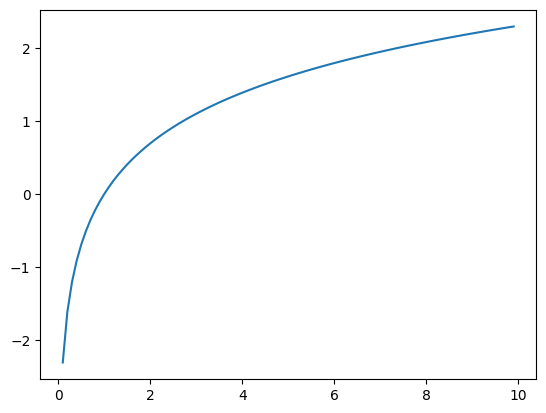

In [22]:

s1 = pd.Series(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
               index=list("abcdef"))
s2 = pd.Series(['apple', 'kiwi', 'orange', 'pear', 'cherry', 'grape'],
               index=list("abcdef"))
s3 = pd.Series(np.log(np.arange(0.1,10,.1)), index=np.arange(0.1,10,.1))
# print(s3)
s4 = np.array([""])

s1.unique()
s1.count()
s1.compare(s2)
s1.filter(['a'])
s3.plot()
s1.drop(['b','f'])
s3.apply(lambda x: np.abs(x))

## Timestamp

In [27]:
dates = pd.Series(['1-4-1988', '1-1-1987', '1-12-2011', '1-6-2005', '1-5-2005'])
tss = pd.to_datetime(dates,format="%d-%m-%Y")
# print(tss)
tss.min()
tss.max()
tss.sort_values()

1   1987-01-01
0   1988-04-01
4   2005-05-01
3   2005-06-01
2   2011-12-01
dtype: datetime64[ns]

# DataFrame

The pandas' DataFrame is a 2-dimensional structure which may be viewed as a collection of Series. It has indices for both dimensions. We will use the terms observations and variables for rows and columns interchangeably. DataFrame, and Series, can hold dimensions $>2$ with the so called `hierarchical indexing` which is beyond the scope of this course.

&#9888; We will be working with homogeneous Series in the context of DataFrames.

To create a DataFrame use the function pd.DataFrame:

**Synopsis: &nbsp; &nbsp;**<tt>DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)</tt>

Most arguments are familiar from pd.Series except the additional *columns* with which the indices of the second dimension are controlled.


In [3]:
df = pd.DataFrame(data=[[3,'a'], [5,'b'], [7,'c']],                    # list, tuple, or np.array
                  columns=['x', 'y'])                                  #
print(df)
df = pd.DataFrame({'x': [3,5,7], 'y': ['a','b','c']})                  # dictionary of columns
print(df)
df = pd.DataFrame({3:'a', 5:'b', 7: 'c'}.items(), columns= ['x','y'])  # dictionary of rows
print(df)

   x  y
0  3  a
1  5  b
2  7  c
   x  y
0  3  a
1  5  b
2  7  c
   x  y
0  3  a
1  5  b
2  7  c


## DataFrame : read/write

You may want to store or share with others the DataFrame you just created. The most common data format to store a DataFrame is comma-separated-values (csv) format. Use `to_csv` method to export a DataFrame and `pd.read_csv` import:

In [6]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)})
df.to_csv("df.csv",index=False)   # write df to file 'df.csv', do not include index
df = pd.read_csv("df.csv")        # read df.csv into df object

## Inspect content

In [37]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables
print(df)

df.head()                   # top 5 (default) observation
df.tail(2)                  # last 2 observations
df.head(4).tail(2)          # composition
df.shape                    # size of the dimensions
df.size                     # total number of elements
df.columns                  # the columns indices/names
df.dtypes                   # listing of all columns' types
df.describe()               # descriptive summary of all variables

          x         y
0  0.217120  1.462187
1 -0.605360 -2.063091
2 -0.231387  1.303803
3  0.214856 -1.926886
4 -0.234689 -0.270285
5  1.051547 -0.343231
6  2.341692  0.834851
7  0.368187  0.271252
8  0.500891 -0.423315
9  0.041446  1.460753


,x,y
count,10.000000,10.000000
mean,0.366430,0.030604
std,0.830202,1.294097
min,-0.605360,-2.063091
25%,-0.163179,-0.403294
50%,0.215988,0.000484
75%,0.467715,1.186565
max,2.341692,1.462187


## Select columns

### Single column

You can select a column from a DataFrame using the square bracket `df["column_name"]` or `df.column_name`. When only one column name is given the result is a Series, with a list of columns the result is a DataFrame:

In [42]:
df["x"]   # Series
df.x      # <=>  df["x"]
df[["x"]] # DataFrame

,x
0,0.217120
1,-0.605360
2,-0.231387
3,0.214856
4,-0.234689
5,1.051547
6,2.341692
7,0.368187
8,0.500891
9,0.041446


Only `valid python names` can be accessed through dot `.`:

In [43]:
pd.DataFrame({'valid_name': [1,2,3], 'another_variable':[3,2,1]  }).another_variable

0    3
1    2
2    1
Name: another_variable, dtype: int64

### Multiple columns

Use a list of indices to select multiple columns:

In [46]:
df[['Periods', 'TotalSupply_1']]  # explicit
# df[df.columns[[0,1]]]             # use indices on df.columns

KeyError: "None of [Index(['Periods', 'TotalSupply_1'], dtype='object')] are in the [columns]"

## Select rows

### Using logical criteria

Similar to NumPy logical masks we can filter out rows for which the logical condition succeeds. A condition on the variables of a DataFrame returns a logical value for each row in a format of a `Series` object:

In [50]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables
df[((df.x < 0) & (df.y > 0))]  # parentheses are required

,x,y
1,-0.900535,0.662543
4,-1.385984,0.306973
8,-0.138891,0.530468


### Using index : loc method

Rows in a Dataframe are by default indexed with $[0,n)$. The `DataFrame` method `loc` can be used in the following forms:

- `df.loc[<row-label>]`                : select a row by numeric index
- `df.loc[<row-label>,<column-label>]` : select the indexed entry

Both row-label and column-label may take values such as, a single label,  list/array of labels, slices, boolean arrays and series. Though these indexing schemes may look similar to NumPy, there are two cautionary remarks:

- The labels are not positional indices.
- The slices used with `.loc` are inclusive of start and stop, i.e. [0,k].


In [61]:
print(df)
print(type(df))
print(type(df.loc[1]))               # [.] row 1 as a Series
df.loc[[1]]             # [[.]] row 1 as a DataFrame
print(df.loc[1,'x'])           # [.,.] labels
type(df.loc[1,'x'])
df.loc[0:3, 'x':'y']   # [.,.] slices
type(df.loc[0:3, 'x':'y'])
df.loc[df.x > df.y,'x'] # [.,.] boolean

          x         y
0 -1.069992 -1.405668
1 -0.900535  0.662543
2  0.657293  0.249722
3  2.028408 -1.651487
4 -1.385984  0.306973
5  0.689504 -0.029808
6  0.733114  0.298463
7  1.711407 -0.269381
8 -0.138891  0.530468
9 -0.792935 -0.932100
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
-0.9005350956197362


0   -1.069992
2    0.657293
3    2.028408
5    0.689504
6    0.733114
7    1.711407
9   -0.792935
Name: x, dtype: float64

**iloc:** Also take a look at the method `iloc` which is similar to `loc` except it only accepts positional integers or ranges for rows and columns indices.

## Update variables

DataFrame's columns can be updated with an assignment `=` with or without a row selection:

In [70]:
df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)})
df.shape
print(df.shape[1])
df.x=range(df.shape[0])            # variable size and the size of the new values must match.
print(df)
df.loc[(df.x % 2 ==0),'y'] = None  # set y values to NaN where x is an even value
print(df)

2
   x         y
0  0  0.141535
1  1 -0.337004
2  2  0.640522
3  3 -0.359346
4  4 -0.096313
5  5 -0.113308
6  6 -1.376279
7  7  1.054441
8  8  0.249249
9  9 -0.208391
   x         y
0  0       NaN
1  1 -0.337004
2  2       NaN
3  3 -0.359346
4  4       NaN
5  5 -0.113308
6  6       NaN
7  7  1.054441
8  8       NaN
9  9 -0.208391


Value update according to a selection should only be done using `.loc` (or `.iloc`) method. For example both selections below are equivalent but only the `.loc` version can be used in an assignment:

In [78]:
s1 = df[0::2]['y']      # selection with composition (aka chained)
print(s1)
s2 = df.loc[0::2, 'y']  # selection with loc
print(s2)
s1.equals(s2)           # s1 == s2
# df[0::2]['y'] = -2      # warning
df.loc[0::2, 'y'] = -2  # valid
df

0   -2.0
2   -2.0
4   -2.0
6   -2.0
8   -2.0
Name: y, dtype: float64
0   -2.0
2   -2.0
4   -2.0
6   -2.0
8   -2.0
Name: y, dtype: float64


,x,y
0,0,-2.000000
1,1,-0.337004
2,2,-2.000000
3,3,-0.359346
4,4,-2.000000
5,5,-0.113308
6,6,-2.000000
7,7,1.054441
8,8,-2.000000
9,9,-0.208391


## Merge Series and DataFrames

To combine DataFrames use the `pd.concat` function:

**Synopsis: &nbsp; &nbsp;**<tt>concat(objs, axis=0, ignore_index=False, copy=True)</tt>

In [81]:
s1 = pd.Series(list("abcd"))          # ['a', 'b', 'c', 'd']

s2 = pd.Series(range(4))              # [0, 4)
pd.concat([s1,s2])                    # Series
pd.concat([s1,s2], ignore_index=True)  # Series
pd.concat([s1,s2], axis=1)            # DataFrame

,0,1
0,a,0
1,b,1
2,c,2
3,d,3


In [5]:
df1 = pd.DataFrame({'a':range(3), 'b':list("abc")})
print(df1)
df2 = pd.DataFrame({'a':range(5), 'b':list("abcde"[::-1])})
print(df2)
pd.concat([df1,df2], axis=0, join='outer')  # along axis 0
# pd.concat([df1,df2], axis=1, join='outer')  # along axis 1

   a  b
0  0  a
1  1  b
2  2  c
   a  b
0  0  e
1  1  d
2  2  c
3  3  b
4  4  a


,a,b
0,0,a
1,1,b
2,2,c
0,0,e
1,1,d
2,2,c
3,3,b
4,4,a


## Add row to DataFrame

For this we can use the `pd.concat` function:

In [85]:
df = pd.DataFrame({'Year': [2021, 2021], 'Month': [11, 12],'Day': [9, 16]})
print(df)
new_row =  pd.DataFrame({'Year': [2023], 'Month': [3],'Day': [20]})
print(new_row)
pd.concat([df, new_row])

   Year  Month  Day
0  2021     11    9
1  2021     12   16
   Year  Month  Day
0  2023      3   20


,Year,Month,Day
0,2021,11,9
1,2021,12,16
0,2023,3,20


## Missing values

Recall the special values None and NaN from the lectures representing no value and not a number. They are of different types and have different properties. In the context of DataFrames we have the notion of missing values, and they can be represented by both.

NaN and None types:

In [86]:
s = pd.Series(["0", float('nan'), np.nan,  2, None])
print(s)
[type(v) for v in s]

0       0
1     NaN
2     NaN
3       2
4    None
dtype: object


[str, float, float, int, NoneType]

### Handling missing data

Possible actions when dealing with missing data are  *summarise*, *remove* or *replace* missing values.

To be able to do any action on missing values you'll need to first find them. DataFrame and Series have the methods `isna` and `isnull` (alias to `isna`) for finding missing values. Both return a logical mask with `True` marking the location of the missing values. We will use `isna` throughout the lectures.

In [88]:
s.isna()      # isna: boolean marking missing value
s[s.notna()]  # <=> s[~ s.isna()]

0    0
3    2
dtype: object

With `dropna` you may discard all missing from a Series object. With DataFrames you'll have more control in how to discard the missing

**Synopsis: &nbsp; &nbsp;**<tt>pandas.DataFrame.dropna(axis=0, how='any', thresh=None, inplace=False)</tt>

In [90]:
sample_space = np.arange(10).tolist() + ([np.nan]*2)
print(sample_space)
df = pd.DataFrame(rng.choice(sample_space,25).reshape(5,5))
print(df)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, nan, nan]
     0    1    2    3    4
0  9.0  1.0  1.0  3.0  2.0
1  1.0  4.0  1.0  3.0  NaN
2  2.0  0.0  NaN  5.0  NaN
3  6.0  3.0  7.0  6.0  2.0
4  NaN  2.0  7.0  0.0  0.0


In [93]:
# df.dropna(axis=0) # default : drop rows having any missing values
# df.dropna(axis=1) # drop columns having any missing values
df.dropna(axis=1, how='all') # drop columns having only missing values

,0,1,2,3,4
0,9.0,1.0,1.0,3.0,2.0
1,1.0,4.0,1.0,3.0,NaN
2,2.0,0.0,NaN,5.0,NaN
3,6.0,3.0,7.0,6.0,2.0
4,NaN,2.0,7.0,0.0,0.0


With `fillna` we can replace the missing with values, either fixed or a set of values (Series,DataFrame etc.) according to the indices. We only illustrate scalars here:

In [96]:
df.fillna(0)
df.fillna(df.mean(axis=0))

,0,1,2,3,4
0,9.0,1.0,1.0,3.0,2.000000
1,1.0,4.0,1.0,3.0,1.333333
2,2.0,0.0,4.0,5.0,1.333333
3,6.0,3.0,7.0,6.0,2.000000
4,4.5,2.0,7.0,0.0,0.000000


## Group operations

When the data has categorical variables we may be interested in descriptive statistics on each group. This can be done by first grouping the data with `groupby` method and then summarise on those groups. I'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset for illustration.

In [97]:
diamonds = pd.read_csv("data/diamonds.csv") # read diamonds.csv

In [104]:
grp = diamonds[diamonds.columns.drop(['color'])].groupby(['cut', 'clarity'], as_index=False) #
grp.indices
print(grp.ngroups)
df = grp.mean()
print(df)

40
          cut clarity     carat      depth      table        price         x  \
0        Fair      I1  1.361000  65.699048  58.114286  3703.533333  6.723000   
1        Fair      IF  0.474444  60.066667  59.111111  1912.333333  5.050000   
2        Fair     SI1  0.964632  63.910294  59.126961  4208.279412  6.127230   
3        Fair     SI2  1.203841  64.421888  58.828326  5173.916309  6.570343   
4        Fair     VS1  0.879824  62.945294  60.365294  4165.141176  5.932353   
5        Fair     VS2  0.885249  63.637548  59.050958  4174.724138  5.966590   
6        Fair    VVS1  0.664706  60.417647  61.235294  3871.352941  5.503529   
7        Fair    VVS2  0.691594  62.847826  59.237681  3349.768116  5.495507   
8        Good      I1  1.203021  62.067708  59.497917  3596.635417  6.651562   
9        Good      IF  0.616338  61.440845  59.056338  4098.323944  5.278310   
10       Good     SI1  0.830397  62.696346  58.430962  3689.533333  5.799776   
11       Good     SI2  1.035227  62.2